# Chicago Crime Map

In this notebook we'll continue analysing our Chicago crime dataset, but with a focus on the crime locations and different ways of visualising geographic data. We're going to be using [Matplotlib Basemap](https://matplotlib.org/basemap/).

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # a new dependency

Read the data just like in the previous section

In [2]:
crimes_file_path = 'data/chicago_crime/crimes.csv.gzip'
# parsing weather data and make sure we're reading in just the 2016 data
crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True, compression='gzip')['2016']
crimes2016.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,10956651,JA277470,027XX N PULASKI RD,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,2524,...,30.0,22.0,06,1149253.0,1917891.0,2016,02/10/2018 03:50:01 PM,41.930619,-87.726946,"(41.930619258, -87.726946235)"
2016-01-01,10478256,HZ217384,030XX N HAMLIN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,2523,...,30.0,21.0,20,1150761.0,1919927.0,2016,02/10/2018 03:50:01 PM,41.936177,-87.721351,"(41.936176812, -87.721351222)"
2016-01-01,10479192,HZ218038,012XX S PRAIRIE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,132,...,2.0,33.0,11,1178107.0,1894643.0,2016,02/10/2018 03:50:01 PM,41.866217,-87.621624,"(41.866216769, -87.621623622)"
2016-01-01,10654040,HZ403662,053XX W CHICAGO AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,1524,...,37.0,25.0,06,1140387.0,1904812.0,2016,02/10/2018 03:50:01 PM,41.894896,-87.759849,"(41.894896457, -87.759848588)"
2016-01-01,11061033,JA394658,110XX S STATE ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,513,...,34.0,49.0,02,1178209.0,1831939.0,2016,02/10/2018 03:50:01 PM,41.694148,-87.623150,"(41.694148281, -87.623150288)"


For every crime incident, we are interested in the latitude and longitude values – the geographic location of the crime.

In [3]:
crimes2016[:5].loc[:, ['Latitude', 'Longitude']]

,Latitude,Longitude
Date,,
2016-01-01,41.930619,-87.726946
2016-01-01,41.936177,-87.721351
2016-01-01,41.866217,-87.621624
2016-01-01,41.894896,-87.759849
2016-01-01,41.694148,-87.623150


## Basemap basics

/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/opt/conda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


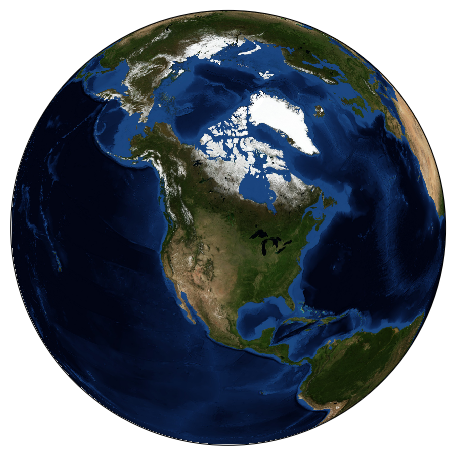

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)